In [386]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import seaborn as sns
import pickle, gzip
from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn.cluster import KMeans

In [387]:
def get_data():
    with gzip.open('mnist.pkl.gz', 'rb') as fd:
        u = pickle._Unpickler(fd)
        u.encoding = 'latin1'
        train_set, valid_set, test_set = u.load()
        return train_set, valid_set, test_set

In [388]:
train_set, valid_set, test_set = get_data()

In [389]:
len(train_set)

2

In [390]:
# combine train and val
train_set = (np.concatenate([train_set[0], valid_set[0]], axis=0), 
                np.concatenate([train_set[1], valid_set[1]], axis=0))

In [391]:
len(train_set[0])

60000

In [392]:
len(train_set[0][0])

784

In [393]:
train_set[0].reshape(60000,28,28).shape

(60000, 28, 28)

In [394]:
#Creating 4x4 grid of 10x10 patches
def patch_creation(image):
    patches = []
    x=[0,6,12,18]
    y=[0,6,12,18]
    for i in range(4):
        for j in range(4):
            patch = image[x[i]:x[i]+10,y[j]:y[j]+10].reshape(-1,100)
            patches.append(patch)
    return(patches)

In [395]:
image = train_set[0][1].reshape(28,28)

In [396]:
image.shape

(28, 28)

In [397]:
test = patch_creation(image)

In [398]:
len(test)

16

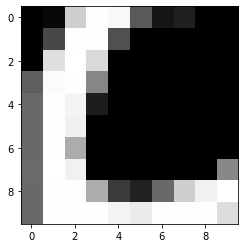

In [399]:
plt.imshow(test[9].reshape(10, 10), cmap='Greys_r')

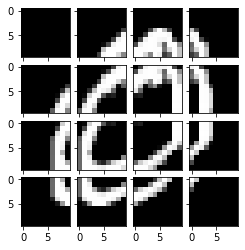

In [400]:
fig = plt.figure(figsize=(4., 4.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, [test[0].reshape(10, 10), test[1].reshape(10, 10), test[2].reshape(10, 10), test[3].reshape(10, 10),
                        test[4].reshape(10, 10), test[5].reshape(10, 10), test[6].reshape(10, 10), test[7].reshape(10, 10),
                        test[8].reshape(10, 10), test[9].reshape(10, 10),test[10].reshape(10, 10),test[11].reshape(10, 10),
                        test[12].reshape(10, 10), test[13].reshape(10, 10),test[14].reshape(10, 10),test[15].reshape(10, 10)]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap='Greys_r')

plt.show()

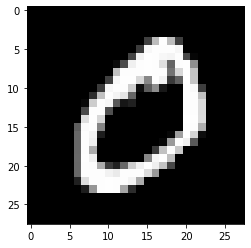

In [401]:
plt.imshow(image.reshape(28, 28), cmap='Greys_r')

In [402]:
training_patches=[]
for i in range(60000):
    image = train_set[0][i].reshape(28,28)
    training_patches.append(patch_creation(image))

In [403]:
len(training_patches)

60000

In [404]:
len(training_patches[0])

16

In [405]:
train_cluster=[]
for i in range(60000):
    n = random.randint(0, 15)
    train_cluster.append(training_patches[i][n])

In [406]:
len(train_cluster[10][0])

100

In [407]:
len(train_cluster[100][0])

100

In [408]:
indices = random.sample(range(60000), 6000)

In [409]:
train_cluster_sample=[]
for ind in indices:
    train_cluster_sample.append(train_cluster[ind])

In [410]:
len(train_cluster_sample)

6000

In [411]:
train_cluster_sample[0][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [412]:
training_matrix = np.zeros((6000,100))
for i in range(6000):
    training_matrix[i,:] = train_cluster_sample[i][0]

In [413]:
training_matrix[1,:]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0625    , 0.79296875, 0.98828125, 0.65234375,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.11328125, 0.98828125, 0.99609375, 0.10546875,
       0.07421875, 0.        , 0.        , 0.        , 0.        ,
       0.26171875, 0.70703125, 0.984375  , 0.59375   , 0.01171875,
       0.81640625, 0.70703125, 0.22265625, 0.46875   , 0.76953125,
       0.9375    , 0.95703125, 0.4609375 , 0.12109375, 0.        ,
       0.984375  , 0.984375  , 0.984375  , 0.98828125, 0.984375  ,
       0.8984375 , 0.47265625, 0.        , 0.        , 0.        ,
       0.4375    , 0.5       , 0.984375  , 0.7421875 , 0.4375    ,
       0.09765625, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [414]:
# create kmeans object
kmeans = KMeans(n_clusters=50)
# fit kmeans object to data
kmeans.fit(training_matrix)
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(training_matrix)

[[ 2.14843750e-02  2.54755435e-02  6.13111413e-02 ...  8.68376359e-01
   7.82438859e-01  6.68138587e-01]
 [ 1.57374101e-03  4.01866007e-03  2.74842626e-02 ...  4.83082284e-02
   9.54080486e-02  1.33852293e-01]
 [ 3.32746479e-01  6.08604754e-01  7.73987676e-01 ...  1.55424736e-02
   6.62962148e-03 -3.05311332e-16]
 ...
 [ 1.83944874e-01  2.45391503e-01  5.44197683e-01 ...  4.68311096e-02
   1.75561798e-02  1.12359551e-02]
 [ 8.53365385e-03  1.10276442e-02  1.05018029e-02 ...  3.84780649e-01
   6.47641226e-01  7.51457332e-01]
 [ 1.00961538e-01  8.10296474e-02  6.11979167e-02 ...  5.36358173e-01
   4.21674679e-01  3.58974359e-01]]


In [415]:
training_matrix_60k = np.zeros((60000,100))
for i in range(60000):
    training_matrix_60k[i,:] = train_cluster[i][0]

In [416]:
y_km_60k = kmeans.fit_predict(training_matrix_60k)

In [417]:
np.unique(y_km_60k)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int32)

In [418]:
cluster_dict=[]
for i in range(50):
    subtrain_matrix = training_matrix_60k[y_km_60k==0,:]
    kmeans_sub = KMeans(n_clusters=50)
    kmeans_sub.fit(subtrain_matrix)
    y_km_sub = kmeans_sub.fit_predict(subtrain_matrix)
    cluster_dict.append(y_km_sub)

In [419]:
def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 0)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value

In [420]:
def plot_image(test): 
    fig = plt.figure(figsize=(4., 4.))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                     axes_pad=0.1,  # pad between axes in inch.
                     )

    for ax, im in zip(grid, [test[0].reshape(10, 10), test[1].reshape(10, 10), test[2].reshape(10, 10), test[3].reshape(10, 10),
                            test[4].reshape(10, 10), test[5].reshape(10, 10), test[6].reshape(10, 10), test[7].reshape(10, 10),
                            test[8].reshape(10, 10), test[9].reshape(10, 10),test[10].reshape(10, 10),test[11].reshape(10, 10),
                            test[12].reshape(10, 10), test[13].reshape(10, 10),test[14].reshape(10, 10),test[15].reshape(10, 10)]):
        # Iterating over the grid returns the Axes.
        ax.imshow(im, cmap='Greys_r')

    plt.show()

In [421]:
print(testing_b_original.shape)

(28, 28)


In [422]:
testing_b_padded = np.pad(testing_b_original, 1, pad_with)
print(testing_b_padded.shape)

(30, 30)


In [423]:
def patch_b(image):
    patches16 = []
    x_ = [0, 1, 2]
    y_ = [0, 1, 2]
    x=[0,6,12,18]
    y=[0,6,12,18]
    for i in x:
        for j in y:
            patches9 = []
            for k in x_:
                for l in y_:
                    patch = image[i+k:i+k+10, j+l:j+l+10].reshape(-1,100)
                    patches9.append(patch)
            patches16.append(patches9)
    return patches16

In [424]:
testing_patches = []
for i in range(10000):
    testing_reshaped = test_set[0][i].reshape(28,28)
    testing_padded = np.pad(testing_reshaped, 1, pad_with)
    testing_patched = patch_b(testing_b_padded)
    testing_patches.append(testing_patched)